In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import json 

In [2]:
class result:
    def __init__(self,fname):
        with open(fname) as f: 
            self.result_file = json.loads(f.read())
    def plot_upper_limit(self,ax=None,high_mass=None,**kwargs):
        if ax is None:
            ax = plt.gca()
        ax.set_xlabel(self.result_file["independent_variable_label"])
        ax.set_ylabel(self.result_file["limit_label"])
        x = self.result_file[self.result_file["independent_variable"]]
        y = self.result_file["upper_limit"]
        if (high_mass is not None) and (self.result_file["independent_variable"] == "wimp_mass"):
            y.append(y[-1]*high_mass / x[-1])
            x.append(high_mass)
        ax.plot(x,y,label=self.result_file["description"],**kwargs )
        


In [3]:
xenon1t = result("../data_json/xenon1t_si.json")
lz = result("../data_json/lux_run4_combined_SI_2017.json")
#pandax = result("../data_json/darwin_SI_proj_2016.json")

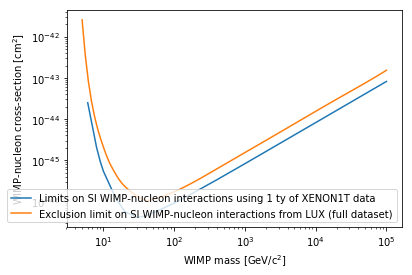

In [4]:
plt.clf()
xenon1t.plot_upper_limit(high_mass = 1e5)
lz.plot_upper_limit()
plt.yscale("log")
plt.xscale("log")
plt.legend(loc="lower right")
plt.show()